### Gerando data sensível falsa.

In [1]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
sensitive_data_gen.write_csv_data_sensitive_only(name="dados_sensiveis_treino.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo de dado'], size=170)
sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_teste.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo de dado'], size=170)
# sensitive_data_gen.write_csv_data_sensitive_only(size=30)

### Imports de bibliotecas importantes

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing

# clear_session() -> limpa os pesos da antiga analise

### Lendo CSV e criando dados de teste e treino

In [3]:
# SEÇÃO TREINAMENTO
# Lendo dados de entrada.
X_train = pd.read_csv("./dados_sensiveis_aleatorio.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

y_train = X_train["tipo de dado"]
X_train.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values

# Tamanhos das entradas.
x_size:int = X_train.size
y_size:int = y_train.size

print(X_train, x_size)
# FIM SESSÃO TREINAMENTO

# SESSÃO DE TESTE.
# Lendo dados de entrada.
X_test = pd.read_csv("./dados_sensiveis_teste2.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

y_test = X_test["tipo de dado"]
X_test.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values

print(X_test, x_size)
# FIM SESSÃO DE TESTE.

                     Dado A            Dado B  \
0    Gustavo Henrique Pires     Android 2.3.4   
1          João Pedro Souza     Android 3.2.6   
2             Lívia Peixoto      675988235130   
3           Francisco Pinto  6011570386264416   
4               Julia Silva     4379450983931   
..                      ...               ...   
164          Juliana Aragão      676274897005   
165           Clara Ribeiro  2714097944621712   
166            Sophie Gomes   370948288984604   
167     João Gabriel Campos     Android 5.0.2   
168            Erick da Luz     Android 7.1.2   

                                  Dado C  tipo de dado  
0                                 Barman             0  
1    Contramestre em transporte marítimo             0  
2                           41 7143 1700             1  
3                    +55 (021) 1623 9198             1  
4                          0800 734 8229             1  
..                                   ...           ...  
164         

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_9788\3769023849.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_9788\3769023849.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criação de modelo

In [4]:
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(8, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() # Mostra os paramestros disponíveis para treinar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


### Treinamento e teste do modelo.

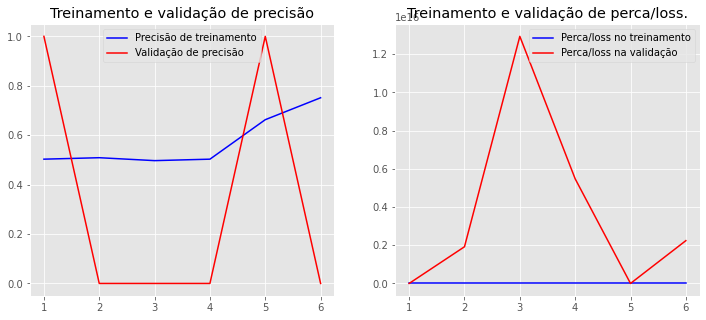

In [5]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

# Treinando o modelo.
#history = model.fit(
#  X_train,
#  y_train,
#  epochs=10,
#  verbose=2,
#)

# Mostrando resultados do treinamento com dataset de train.
#pd.DataFrame(history.history).plot(figsize=(8,5))
#plot.show()


# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=12,
  verbose=False,
  validation_data=(X_test, y_test),
  batch_size=20,
  callbacks =[earlystopping]
)

plot_history(history)


### Realizando a Avaliação do modelo utilizando os dados de teste.

In [6]:
clear_session()

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Previsão no teste: {accuracy}")

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Previsão no teste: 1.0


</hr>

## Resultado

### Com um dataset de tamanho pequeno, foi possível encontrar um modelo de previsão de 100% na detecção de dados sensíveis.

### Agora será testado 10 módelos e feito a média entre eles para verificar se o modelo e os métodos utilizados foram feitos de maneira correta.

### > Criando 10 modelos e pegando 10 pedaços do dataset para comparar precisão entre os modelos Sequenciais

In [7]:
import matplotlib.pyplot as plot
import numpy as np
import random
from plot_history_helper import plot_history
from keras import callbacks
from sklearn.model_selection import StratifiedKFold


# Seed fix para poder reproduzir o "teste".
seed = random.randint(0, 100)
np.random.seed(seed)

X = pd.read_csv("./dados_sensiveis.csv")
X.fillna(X.mean(), inplace=True)

#X = pd.read_csv("./dados_sensiveis_teste.csv")
#X.fillna(X.mean(), inplace=True)

columns = list(X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])

y = X["tipo de dado"]
X.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
y = y.values

print(X, x_size)

# Pegando 10 cortes do dataset original de maneira aleatória.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores:list = []
# Criando 10 modelos com 10 datasets cortados pegos do dataset original e depois comparando os resultados.
for train, test in kfold.split(X, y):
  #print(test, train)
  earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
  # modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
  input_dim = X.shape[1]
  model = keras.Sequential()
  model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  # Configurando o modelo de treinamento.
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary() # Mostra os paramestros disponíveis para treinar
  #Treinando o modelo.
  history = model.fit(
    X[train],
    y[train],
    epochs=10,
    verbose=0,
  )
  scores = model.evaluate(X[test], y[test], verbose=0)
  #loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print(cvscores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

[[  0   0   0]
 [  1   1   1]
 [  2   2   2]
 ...
 [972 578 868]
 [813 579 869]
 [973  18  24]] 507
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_9788\1715675622.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


accuracy: 92.00%
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                48        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
accuracy: 94.00%
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                48        
                                                                 


### Olhando o resultado acima, podemos dizer que o modelos criados possuem um desempenho relativamente bom, considerando que a média esperada é de 70% até 90%.

In [8]:
# CRIANDO UM DATASET COM DADOS ALEATÓRIOS.
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo de dado'], size=1000)

### Carregando um dataset médiano para avaliar o ultimo modelo criado no loop.

In [9]:
# USANDO EM UM CASO "REAL".
# Lendo dados de entrada.
X = pd.read_csv("./dados_sensiveis.csv")
X.fillna(X.mean(), inplace=True)

#X = pd.read_csv("./dados_sensiveis_teste.csv")
#X.fillna(X.mean(), inplace=True)

columns = list(X)
print(X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

print(X)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])

y = X["tipo de dado"]
X.drop(["tipo de dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
y = y.values

print(X, x_size)
# FIM USANDO EM UM CASO "REAL".

                    Dado A               Dado B               Dado C  \
0         Ana da Conceição        Android 4.4.1          Programador   
1              Clara Sales          Android 6.0           Cartunista   
2        Dr. Bryan Peixoto  4646378466420744107         11 5189-1564   
3     Luiz Gustavo Almeida        Android 2.3.7             Ferreiro   
4       Gabrielly Carvalho      213173502878430  +55 (011) 3228 4806   
..                     ...                  ...                  ...   
994         Clarice Vieira          Android 4.4          Contatólogo   
995            Alexia Dias         568643409382  +55 (071) 7466-8880   
996  Ana Vitória Fernandes        Android 3.2.1            Astrônomo   
997      Sr. Antônio Souza       30419828941613  +55 (061) 6105-9229   
998         Mirella Fogaça  4874518042767608111         84 7939 5051   

     tipo de dado  
0               0  
1               0  
2               1  
3               0  
4               1  
..            .

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_9788\107258690.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


### Avaliação do ultimo modelo criado no loop modelo.

In [10]:
# Vendo versão final do resultado.
clear_session()

loss, accuracy = model.evaluate(X, y, verbose=2)
print(f"Previsão no teste: {accuracy}")

32/32 - 0s - loss: 0.5098 - accuracy: 0.8889 - 100ms/epoch - 3ms/step
Previsão no teste: 0.8888888955116272
